In [ ]:
!pip install pyspark django >> None

### Задание 1
Дан набор данных с информацией о студентах и их оценках по предметам. Необходимо использовать функцию pivot (melt) в pyspark для трансформации данных таким образом, чтобы получить таблицу, в которой строки будут соответствовать студентам, столбцы — предметам, а значения — их оценкам. Затем вывести средние оценки студентов по каждому предмету.

1. Инициализируем сессию Spark с именем приложения "pivot_example".
2. Загружаем исходные данные в DataFrame df, который содержит имена студентов, предметы и оценки.
3. Применяем функцию pivot к DataFrame df, группируя данные по столбцу "name" и создавая новые столбцы на основе уникальных значений в столбце "subject". Для каждого уникального значения в столбце "subject" создается новый столбец.
4. Заполняем новые столбцы средними значениями оценок из столбца "grade" для каждой комбинации "name" и "subject".
5. Выводим результат на экран, показывая средние оценки студентов по каждому предмету.


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import pyspark.sql.functions as F
import pandas as pd

spark = SparkSession.builder.appName("pivot_example").getOrCreate()

# Загрузка исходных данных
data = [("Alice", "Math", 90),
    	  ("Alice", "Physics", 85),
        ("Bob", "Math", 70),
        ("Bob", "Physics", 75),
        ("Bob", "History", 80),
        ("John", "Math", 65),
        ("John", "Physics", 75),
        ("Jane", "Math", 100),
    	("Jane", "Physics", 90),
        ("Jane", "History", 95)]
df = spark.createDataFrame(data, ["name", "subject", "grade"])

# Применение функции pivot
pivot_df = df.groupBy("name").pivot("subject").agg(F.avg("grade"))

# Вывод средних оценок студентов по каждому предмету
pivot_df.show()

+-----+-------+-----+-------+
| name|History| Math|Physics|
+-----+-------+-----+-------+
|  Bob|   80.0| 70.0|   75.0|
| John|   NULL| 65.0|   75.0|
|Alice|   NULL| 90.0|   85.0|
| Jane|   95.0|100.0|   90.0|
+-----+-------+-----+-------+



In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import pyspark.sql.functions as F
import pandas as pd

spark = SparkSession.builder.appName("pivot_example").getOrCreate()

# Загрузка исходных данных
data = [("Alice", "Math", 90),
    	  ("Alice", "Physics", 85),
        ("Bob", "Math", 70),
        ("Bob", "Physics", 75),
        ("Bob", "History", 80),
        ("John", "Math", 65),
        ("John", "Physics", 75),
        ("Jane", "Math", 100),
    	("Jane", "Physics", 90),
        ("Jane", "History", 95)]
df = spark.createDataFrame(data, ["name", "subject", "grade"])

# Применение функции pivot
pivot_df = df.groupBy("name").pivot("subject").agg("grade")

# Вывод средних оценок студентов по каждому предмету
pivot_df.show()

AssertionError: all exprs should be Column

In [3]:
df = pd.DataFrame(data, columns = ["name", "subject", "grade"])
df.pivot(index='name', columns='subject', values='grade').sort_values('Physics')

subject,History,Math,Physics
name,,,
Bob,80.0,70.0,75.0
John,NaN,65.0,75.0
Alice,NaN,90.0,85.0
Jane,95.0,100.0,90.0


In [ ]:
# var 2

In [5]:

df = spark.createDataFrame(data, ["name", "subject", "grade"])

# Применение функции pivot
pivot_df = df.groupBy("name").pivot("subject").agg(F.avg("grade"))

# Вывод средних оценок студентов по каждому предмету
pivot_df.show()

+-----+-------+-----+-------+
| name|History| Math|Physics|
+-----+-------+-----+-------+
|  Bob|   80.0| 70.0|   75.0|
| John|   NULL| 65.0|   75.0|
|Alice|   NULL| 90.0|   85.0|
| Jane|   95.0|100.0|   90.0|
+-----+-------+-----+-------+



In [8]:
# VAR2.1
data = [("Alice", "Math", 90),
    	  ("Alice", "Physics", 85),
        ("Bob", "Math", 70),
        ("Bob", "Math", 100),
        ("Bob", "Physics", 75),
        ("Bob", "History", 80),
        ("John", "Math", 65),
        ("John", "Physics", 75),
        ("Jane", "Math", 100),
    	("Jane", "Physics", 90),
        ("Jane", "History", 95)]
df = pd.DataFrame(data, columns = ["name", "subject", "grade"])
df = df.groupby(["name", "subject"]).agg({'grade':'mean'}).reset_index()
df.pivot(index='name', columns='subject', values='grade').sort_values('Physics')

subject,History,Math,Physics
name,,,
Bob,80.0,85.0,75.0
John,NaN,65.0,75.0
Alice,NaN,90.0,85.0
Jane,95.0,100.0,90.0


In [9]:
# VAR2.2
data = [("Alice", "Math", 90),
    	  ("Alice", "Physics", 85),
        ("Bob", "Math", 70),
        ("Bob", "Math", 100),
        ("Bob", "Physics", 75),
        ("Bob", "History", 80),
        ("John", "Math", 65),
        ("John", "Physics", 75),
        ("Jane", "Math", 100),
    	("Jane", "Physics", 90),
        ("Jane", "History", 95)]
df = pd.DataFrame(data, columns = ["name", "subject", "grade"])
df.pivot_table(index='name', columns='subject', values='grade', aggfunc='mean').sort_values('Physics')

subject,History,Math,Physics
name,,,
Bob,80.0,85.0,75.0
John,NaN,65.0,75.0
Alice,NaN,90.0,85.0
Jane,95.0,100.0,90.0


### Задание 2
Найти среднее значение продаж для каждого месяца по каждому продукту, а также для каждого продукта найти месяц с наибольшим объемом продаж.


1. Инициализируем SparkSession: Создаем сессия Spark, которая является точкой входа для работы с Spark API. Это необходимо для выполнения операций с данными.

2. Загружаем данных о продажах: Создаем список кортежей, представляющих данные о продажах, и на основе этого списка создается DataFrame sales_df. Каждый кортеж содержит информацию о продаже: уникальный идентификатор (id), дату продажи (date), название продукта (product) и сумму продажи (amount).

3. Определяем окна для вычисления среднего значения продаж по месяцам: Создаем окно monthly_avg_sales_window, которое разделяет данные на группы по продукту и месяцу продажи, а затем упорядочивает данные внутри каждой группы по дате. Это окно используется для вычисления среднего значения продаж по месяцам для каждого продукта.

4. Добавляем столбцы со средними значениями продаж по месяцам: В исходный DataFrame sales_df добавляем новый столбец monthly_avg_sales, который содержит среднее значение продаж по месяцам для каждого продукта. Это достигается с помощью оконной функции avg и ранее определенного окна monthly_avg_sales_window.

5. Определяем окна для нахождения месяца с наибольшим объемом продаж: Создаем окно max_sales_month_window, которое разделяет данные на группы по продукту и упорядочивает данные внутри каждой группы по убыванию суммы продажи. Это окно используется для вычисления месяца с наибольшим объемом продаж для каждого продукта.

6. Добавляем столбца с месяцем, в котором был наибольший объем продаж: В исходный DataFrame sales_df добавляется новый столбец max_sales_month, который содержит номер месяца, в котором был наибольший объем продаж для каждого продукта. Это достигается с помощью оконной функции first и ранее определенного окна max_sales_month_window.

7. Выводим результатов: В конце выполнения кода выводится содержимое DataFrame sales_df, включая все добавленные столбцы, что позволяет увидеть результаты вычислений средних значений продаж по месяцам и месяцы с наибольшим объемом продаж для каждого продукта.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import Window
from pyspark.sql import functions as F

# Создание сессии Spark
spark = SparkSession.builder.appName("window_functions_example").getOrCreate()

# Загрузка данных о продажах
sales_data = [(1, '2021-01-01', 'product1', 100),
          	  (2, '2021-01-15', 'product1', 150),
              (3, '2021-02-10', 'product1', 200),
 	            (4, '2021-01-05', 'product2', 120),
              (5, '2021-02-20', 'product2', 180),
              (6, '2021-01-08', 'product3', 100),
              (7, '2021-02-13', 'product3', 110),
              (8, '2021-02-22', 'product3', 220),
              (9, '2021-01-02', 'product4', 225),
              (10, '2021-02-28', 'product4', 80)
]
sales_df = spark.createDataFrame(sales_data, ["id", "date", "product", "amount"])

# Оконная функция для нахождения среднего значения продаж по месяцам
monthly_avg_sales_window = Window.partitionBy("product", F.month("date"))
# Добавление столбца со средними значениями продаж по месяцам в исходный DataFrame
sales_df1 = sales_df.withColumn("monthly_avg_sales", F.avg("amount").over(monthly_avg_sales_window))


# Оконная функция для нахождения месяца с наибольшим объемом продаж
max_sales_month_window = Window.partitionBy("product").orderBy(F.desc("amount"))
# Добавление столбца с месяцем, в котором был наибольший объем продаж для каждого продукта
sales_df2 = sales_df1.withColumn("max_sales_month", F.first(F.month("date")).over(max_sales_month_window))

# Вывод результатов
sales_df2.orderBy("date").show()

+---+----------+--------+------+-----------------+---------------+
| id|      date| product|amount|monthly_avg_sales|max_sales_month|
+---+----------+--------+------+-----------------+---------------+
|  1|2021-01-01|product1|   100|            125.0|              2|
|  9|2021-01-02|product4|   225|            225.0|              1|
|  4|2021-01-05|product2|   120|            120.0|              2|
|  6|2021-01-08|product3|   100|            100.0|              2|
|  2|2021-01-15|product1|   150|            125.0|              2|
|  3|2021-02-10|product1|   200|            200.0|              2|
|  7|2021-02-13|product3|   110|            165.0|              2|
|  5|2021-02-20|product2|   180|            180.0|              2|
|  8|2021-02-22|product3|   220|            165.0|              2|
| 10|2021-02-28|product4|    80|             80.0|              1|
+---+----------+--------+------+-----------------+---------------+



In [ ]:
#sales_df.orderBy("date").show()

In [ ]:
sales_df1.orderBy("date").show()

+---+----------+--------+------+-----------------+
| id|      date| product|amount|monthly_avg_sales|
+---+----------+--------+------+-----------------+
|  1|2021-01-01|product1|   100|            125.0|
|  9|2021-01-02|product4|   225|            225.0|
|  4|2021-01-05|product2|   120|            120.0|
|  6|2021-01-08|product3|   100|            100.0|
|  2|2021-01-15|product1|   150|            125.0|
|  3|2021-02-10|product1|   200|            200.0|
|  7|2021-02-13|product3|   110|            165.0|
|  5|2021-02-20|product2|   180|            180.0|
|  8|2021-02-22|product3|   220|            165.0|
| 10|2021-02-28|product4|    80|             80.0|
+---+----------+--------+------+-----------------+



In [ ]:
df = pd.DataFrame(sales_data, columns = ["id", "date", "product", "amount"])
df['month'] = [int(x[5:7]) for x in df['date']]
df.sort_values('date')

,id,date,product,amount,month
0,1,2021-01-01,product1,100,1
8,9,2021-01-02,product4,225,1
3,4,2021-01-05,product2,120,1
5,6,2021-01-08,product3,100,1
1,2,2021-01-15,product1,150,1
2,3,2021-02-10,product1,200,2
6,7,2021-02-13,product3,110,2
4,5,2021-02-20,product2,180,2
7,8,2021-02-22,product3,220,2
9,10,2021-02-28,product4,80,2


In [ ]:
df1 = df.groupby(["product", "month"]).agg({'amount':'mean'}).reset_index()
df1.columns = ["product", "month", "monthly_avg_sales"]
df1

,product,month,monthly_avg_sales
0,product1,1,125.0
1,product1,2,200.0
2,product2,1,120.0
3,product2,2,180.0
4,product3,1,100.0
5,product3,2,165.0
6,product4,1,225.0
7,product4,2,80.0


In [ ]:
df2 = df.merge(df1, how='left', on=["product", "month"])
df2.sort_values('date')

,id,date,product,amount,month,monthly_avg_sales
0,1,2021-01-01,product1,100,1,125.0
8,9,2021-01-02,product4,225,1,225.0
3,4,2021-01-05,product2,120,1,120.0
5,6,2021-01-08,product3,100,1,100.0
1,2,2021-01-15,product1,150,1,125.0
2,3,2021-02-10,product1,200,2,200.0
6,7,2021-02-13,product3,110,2,165.0
4,5,2021-02-20,product2,180,2,180.0
7,8,2021-02-22,product3,220,2,165.0
9,10,2021-02-28,product4,80,2,80.0


In [ ]:
+---+----------+--------+------+-----------------+---------------+
| id|      date| product|amount|monthly_avg_sales|max_sales_month|
+---+----------+--------+------+-----------------+---------------+
|  1|2021-01-01|product1|   100|            125.0|              2|
|  9|2021-01-02|product4|   225|            225.0|              1|
|  4|2021-01-05|product2|   120|            120.0|              2|
|  6|2021-01-08|product3|   100|            100.0|              2|
|  2|2021-01-15|product1|   150|            125.0|              2|
|  3|2021-02-10|product1|   200|            200.0|              2|
|  7|2021-02-13|product3|   110|            165.0|              2|
|  5|2021-02-20|product2|   180|            180.0|              2|
|  8|2021-02-22|product3|   220|            165.0|              2|
| 10|2021-02-28|product4|    80|             80.0|              1|
+---+----------+--------+------+-----------------+---------------+

In [ ]:
df3 = df.groupby(["product", "month"]).agg({'amount':'max'}).reset_index()
df3.columns = ["product", "max_sales_month", "max_sales"]
df3 = df3.sort_values(["product", "max_sales"])
df3

,product,max_sales_month,max_sales
0,product1,1,150
1,product1,2,200
2,product2,1,120
3,product2,2,180
4,product3,1,100
5,product3,2,220
7,product4,2,80
6,product4,1,225


In [ ]:
df4 = df3.drop_duplicates("product", keep='last').reset_index(drop=True)
df4

,product,max_sales_month,max_sales
0,product1,2,200
1,product2,2,180
2,product3,2,220
3,product4,1,225


In [ ]:
df5 = df2.merge(df4[["product", "max_sales_month"]], how='left', on=["product"])
df5.sort_values('date')

,id,date,product,amount,month,monthly_avg_sales,max_sales_month
0,1,2021-01-01,product1,100,1,125.0,2
8,9,2021-01-02,product4,225,1,225.0,1
3,4,2021-01-05,product2,120,1,120.0,2
5,6,2021-01-08,product3,100,1,100.0,2
1,2,2021-01-15,product1,150,1,125.0,2
2,3,2021-02-10,product1,200,2,200.0,2
6,7,2021-02-13,product3,110,2,165.0,2
4,5,2021-02-20,product2,180,2,180.0,2
7,8,2021-02-22,product3,220,2,165.0,2
9,10,2021-02-28,product4,80,2,80.0,1


In [ ]:
+---+----------+--------+------+-----------------+---------------+
| id|      date| product|amount|monthly_avg_sales|max_sales_month|
+---+----------+--------+------+-----------------+---------------+
|  1|2021-01-01|product1|   100|            125.0|              2|
|  9|2021-01-02|product4|   225|            225.0|              1|
|  4|2021-01-05|product2|   120|            120.0|              2|
|  6|2021-01-08|product3|   100|            100.0|              2|
|  2|2021-01-15|product1|   150|            125.0|              2|
|  3|2021-02-10|product1|   200|            200.0|              2|
|  7|2021-02-13|product3|   110|            165.0|              2|
|  5|2021-02-20|product2|   180|            180.0|              2|
|  8|2021-02-22|product3|   220|            165.0|              2|
| 10|2021-02-28|product4|    80|             80.0|              1|
+---+----------+--------+------+-----------------+---------------+

### Задание 3
Предположим, у вас есть набор данных с информацией о продажах в разных регионах. Вам нужно использовать оконные функции для вычисления среднего объема продаж по регионам за последние 3 месяца. Среднее значение приведите к формату DoubleType


1. Инициализируем Spark сессии: Создаем экземпляр SparkSession, который является точкой входа для работы с Spark API. Это необходимо для выполнения операций с данными.

2. Создаем DataFrame: Создаем DataFrame из списка кортежей, где каждый кортеж представляет собой строку данных. В данном случае, каждая строка содержит информацию о продажах (sales) в определенном регионе (region) на определенную дату (date).

3. Преобразовываем типа данных для поля date: Используем функция to_date для преобразования строкового представления даты в тип данных DateType, что позволяет выполнять дальнейшие операции с датами.

4. Вычисляем разницу в днях между текущей датой и датой 90 дней назад: Для каждой строки DataFrame вычисляем количество дней между текущей датой и датой продаж. Это делается с помощью функции datediff, которая принимает текущую дату и дату из DataFrame.

5. Определяем оконную спецификацию: Создаем спецификация окна (window_spec), которая определяет, как будут группироваться данные для оконных функций. В данном случае, данные группируются по региону (region) и сортируются по дате (date). Окно определяется так, чтобы включать все строки от начала данных для каждого региона до 90 дней назад от текущей даты.

6. Вычисляем среднего объема продаж по регионам за последние 90 дней: Используем оконная функция avg для вычисления среднего значения продаж (sales) в каждом окне, определенном в предыдущем шаге. Это среднее значение будет вычислено для каждой строки в окне, что позволяет получить среднее значение продаж за последние 90 дней для каждого региона.

7. Применяем оконную функции и приведение типа к DataFrame: Вычисленное среднее значение продаж за последние 90 дней добавляется в DataFrame как новый столбец avg_sales_last_90_days. Для этого используется метод withColumn, а результат приведения типа к DoubleType гарантирует, что данные будут храниться в формате числа с плавающей точкой.

8. Отображаем результаты: В конце выполнения кода, результаты вычислений отображаем с помощью метода show(), что позволяет визуально проверить результаты работы оконной функции.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
import pyspark.sql.functions as F
from pyspark.sql.types import DoubleType

# Создание Spark сессии
spark = SparkSession.builder.appName("window-functions").getOrCreate()

# Пример данных
data = [(1, "Регион1", "2022-01-01", 100.0),
        (2, "Регион1", "2022-02-15", 150.0),
        (3, "Регион2", "2022-01-10", 120.0),
        (4, "Регион2", "2022-02-28", 200.0),
        (5, "Регион2", "2022-03-31", 100.0),
        (6, "Регион3", "2022-01-15", 150.0),
        (7, "Регион3", "2022-02-11", 120.0),
        (8, "Регион3", "2022-03-28", 200.0),
        (9, "Регион4", "2022-01-03", 100.0),
        (10, "Регион4", "2022-02-18", 150.0),
        (11, "Регион4", "2022-03-10", 120.0),
        (12, "Регион4", "2022-04-21", 200.0)
]

data = [(1, "Регион1", "2024-05-01", 100.0),
        (2, "Регион1", "2024-03-15", 150.0),
        (3, "Регион2", "2024-03-18", 120.0),
        (4, "Регион2", "2024-03-28", 200.0),
        (5, "Регион2", "2024-04-01", 100.0),
        (6, "Регион3", "2024-02-15", 150.0),
        (7, "Регион3", "2024-03-11", 120.0),
        (8, "Регион3", "2024-04-28", 200.0),
        (9, "Регион4", "2024-02-23", 100.0),
        (10, "Регион4", "2024-03-18", 150.0),
        (11, "Регион4", "2024-04-10", 120.0),
        (12, "Регион4", "2024-05-21", 200.0)
]


# Создание DataFrame
schema = ["id", "region", "date", "sales"]
df = spark.createDataFrame(data, schema)

# Преобразование поля date в тип данных DateType
df = df.withColumn("date", F.to_date("date"))

# Вычисление разницы в днях между текущей датой и датой 90 дней назад
df = df.withColumn("days_since_90", F.datediff(F.current_date(), "date"))

# Определение оконной спецификации
window_spec = Window.partitionBy("region").orderBy("date").rowsBetween(Window.unboundedPreceding, 90)

# Вычисление среднего объема продаж по регионам за последние 90 дней
avg_sales_last_90_days = F.avg("sales").over(window_spec)

# Применение оконной функции и cast к DataFrame
result_df = df.withColumn("avg_sales_last_90_days", avg_sales_last_90_days.cast(DoubleType()))

result_df.show()

+---+-------+----------+-----+-------------+----------------------+
| id| region|      date|sales|days_since_90|avg_sales_last_90_days|
+---+-------+----------+-----+-------------+----------------------+
|  2|Регион1|2024-03-15|150.0|          104|                 125.0|
|  1|Регион1|2024-05-01|100.0|           57|                 125.0|
|  3|Регион2|2024-03-18|120.0|          101|                 140.0|
|  4|Регион2|2024-03-28|200.0|           91|                 140.0|
|  5|Регион2|2024-04-01|100.0|           87|                 140.0|
|  6|Регион3|2024-02-15|150.0|          133|    156.66666666666666|
|  7|Регион3|2024-03-11|120.0|          108|    156.66666666666666|
|  8|Регион3|2024-04-28|200.0|           60|    156.66666666666666|
|  9|Регион4|2024-02-23|100.0|          125|                 142.5|
| 10|Регион4|2024-03-18|150.0|          101|                 142.5|
| 11|Регион4|2024-04-10|120.0|           78|                 142.5|
| 12|Регион4|2024-05-21|200.0|           37|    

In [ ]:
df.orderBy("date").show()

+---+-------+----------+-----+-------------+
| id| region|      date|sales|days_since_90|
+---+-------+----------+-----+-------------+
|  6|Регион3|2024-02-15|150.0|          133|
|  9|Регион4|2024-02-23|100.0|          125|
|  7|Регион3|2024-03-11|120.0|          108|
|  2|Регион1|2024-03-15|150.0|          104|
| 10|Регион4|2024-03-18|150.0|          101|
|  3|Регион2|2024-03-18|120.0|          101|
|  4|Регион2|2024-03-28|200.0|           91|
|  5|Регион2|2024-04-01|100.0|           87|
| 11|Регион4|2024-04-10|120.0|           78|
|  8|Регион3|2024-04-28|200.0|           60|
|  1|Регион1|2024-05-01|100.0|           57|
| 12|Регион4|2024-05-21|200.0|           37|
+---+-------+----------+-----+-------------+



In [ ]:
from django.utils import dateparse
from datetime import timedelta
import datetime

In [ ]:
startdate = "2022-01-01"
stopdate = (dateparse.parse_datetime(startdate)+timedelta(days=90)).strftime('%Y-%m-%d')
stopdate


'2022-04-01'

In [ ]:
startdate = datetime.datetime.now().strftime('%Y-%m-%d')
stopdate = (dateparse.parse_datetime(startdate)+timedelta(days=0)).strftime('%Y-%m-%d')
stopdate

'2024-06-27'

In [ ]:
startdate = datetime.datetime.now().strftime('%Y-%m-%d')
stopdate = "2022-01-01"
(dateparse.parse_datetime(startdate)-dateparse.parse_datetime(stopdate)).days

908

In [ ]:
startdate = datetime.datetime.now().strftime('%Y-%m-%d')
df = pd.DataFrame(data, columns = ["id", "region", "date", "sales"])
df['days_since_90'] = [ (dateparse.parse_datetime(startdate)-dateparse.parse_datetime(x)).days for x in df['date']]
df.sort_values('date')

,id,region,date,sales,days_since_90
5,6,Регион3,2024-02-15,150.0,133
8,9,Регион4,2024-02-23,100.0,125
6,7,Регион3,2024-03-11,120.0,108
1,2,Регион1,2024-03-15,150.0,104
2,3,Регион2,2024-03-18,120.0,101
9,10,Регион4,2024-03-18,150.0,101
3,4,Регион2,2024-03-28,200.0,91
4,5,Регион2,2024-04-01,100.0,87
10,11,Регион4,2024-04-10,120.0,78
7,8,Регион3,2024-04-28,200.0,60


In [ ]:
df1 = df.groupby(["region"]).agg({'sales':'mean'}).reset_index()
df1.columns = ["region", "avg_sales_last_90_days"]
df1

,region,avg_sales_last_90_days
0,Регион1,125.000000
1,Регион2,140.000000
2,Регион3,156.666667
3,Регион4,142.500000


In [ ]:
df2 = df.merge(df1, how='left', on=["region"])
df2.sort_values('region')

,id,region,date,sales,days_since_90,avg_sales_last_90_days
0,1,Регион1,2024-05-01,100.0,57,125.000000
1,2,Регион1,2024-03-15,150.0,104,125.000000
2,3,Регион2,2024-03-18,120.0,101,140.000000
3,4,Регион2,2024-03-28,200.0,91,140.000000
4,5,Регион2,2024-04-01,100.0,87,140.000000
5,6,Регион3,2024-02-15,150.0,133,156.666667
6,7,Регион3,2024-03-11,120.0,108,156.666667
7,8,Регион3,2024-04-28,200.0,60,156.666667
8,9,Регион4,2024-02-23,100.0,125,142.500000
9,10,Регион4,2024-03-18,150.0,101,142.500000


In [ ]:
+---+-------+----------+-----+-------------+----------------------+
| id| region|      date|sales|days_since_90|avg_sales_last_90_days|
+---+-------+----------+-----+-------------+----------------------+
|  2|Регион1|2024-03-15|150.0|          104|                 125.0|
|  1|Регион1|2024-05-01|100.0|           57|                 125.0|
|  3|Регион2|2024-03-18|120.0|          101|                 140.0|
|  4|Регион2|2024-03-28|200.0|           91|                 140.0|
|  5|Регион2|2024-04-01|100.0|           87|                 140.0|
|  6|Регион3|2024-02-15|150.0|          133|    156.66666666666666|
|  7|Регион3|2024-03-11|120.0|          108|    156.66666666666666|
|  8|Регион3|2024-04-28|200.0|           60|    156.66666666666666|
|  9|Регион4|2024-02-23|100.0|          125|                 142.5|
| 10|Регион4|2024-03-18|150.0|          101|                 142.5|
| 11|Регион4|2024-04-10|120.0|           78|                 142.5|
| 12|Регион4|2024-05-21|200.0|           37|                 142.5|
+---+-------+----------+-----+-------------+----------------------+--

### Задание 4
Вам предоставлен набор данных с информацией о покупках в интернет-магазине. Необходимо написать пользовательскую функцию (udf), которая будет преобразовывать категорию товара в стоимость доставки. Для этого предположим, что стоимость доставки зависит от категории товара, следующим способом


1. Инициализируем SparkSession: Создается сессия Spark, которая является точкой входа для работы с Spark API. Это необходимо для выполнения операций с данными.

2. Создаем DataFrame: Создается DataFrame с двумя колонками: "товар" и "категория". DataFrame представляет собой распределенную коллекцию данных, организованную в колонки. В данном случае, DataFrame заполняется примерами данных о товарах и их категориях.

3. Определяем пользовательской функции (UDF): Определяем функцию calculate_shipping_cost, которая принимает категорию товара в качестве аргумента и возвращаем стоимость доставки в зависимости от категории. Эта функция используется для расчета стоимости доставки для разных категорий товаров.

4. Регистрируем UDF: Функция calculate_shipping_cost регистрируем как пользовательскую функцию (UDF) в Spark, что позволяет использовать ее в DataFrame операциях. UDF позволяет применять функции, написанные на Python, к данным в DataFrame.

5. Применяем UDF к DataFrame: Применяется UDF к колонке "категория" DataFrame, создавая новую колонку "стоимость_доставки". Это делается с помощью метода withColumn, который добавляет новую колонку в DataFrame, результатом которой является вызов UDF для каждой строки в колонке "категория".

6. Отображаем результатов: Выводим содержимое DataFrame с добавленной колонкой "стоимость_доставки" с помощью метода show(). Это позволяет увидеть результаты применения UDF к данным.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Создаем сессию Spark
spark = SparkSession.builder.appName("udf_example").getOrCreate()

# Пример данных
data = [("Смартфон", "электроника"),
        ("Пуловер", "одежда"),
        ("Ролики", "спорт"),
        ("Стиральная машина", "электроника"),
        ("Эспандер", "спорт"),
        ("Баскетбольный мяч", "спорт"),
        ("Холодильник", "электроника"),
        ("Колготки", "одежда"),
        ("Футболка", "одежда"),
        ]
df = spark.createDataFrame(data, ["товар", "категория"])

# Стоимость доставки в зависимости от категории товара
def calculate_shipping_cost(category):
    if category == "электроника":
        return 50
    elif category == "одежда":
        return 30
    elif category == "спорт":
        return 40
    else:
        return 20 # если категория не определена, предположим стандартную стоимость

# Регистрируем пользовательскую функцию (udf)
shipping_cost_udf = udf(calculate_shipping_cost, IntegerType())

# Применяем удф к колонке "категория" и создаем новую колонку "стоимость_доставки"
df = df.withColumn("стоимость_доставки", shipping_cost_udf(df["категория"]))

df.show()

+-----------------+-----------+------------------+
|            товар|  категория|стоимость_доставки|
+-----------------+-----------+------------------+
|         Смартфон|электроника|                50|
|          Пуловер|     одежда|                30|
|           Ролики|      спорт|                40|
|Стиральная машина|электроника|                50|
|         Эспандер|      спорт|                40|
|Баскетбольный мяч|      спорт|                40|
|      Холодильник|электроника|                50|
|         Колготки|     одежда|                30|
|         Футболка|     одежда|                30|
+-----------------+-----------+------------------+



In [ ]:
df = pd.DataFrame(data, columns = ["товар", "категория"])
df

,товар,категория
0,Смартфон,электроника
1,Пуловер,одежда
2,Ролики,спорт
3,Стиральная машина,электроника
4,Эспандер,спорт
5,Баскетбольный мяч,спорт
6,Холодильник,электроника
7,Колготки,одежда
8,Футболка,одежда


In [ ]:
def calculate_shipping_cost(category):
    if category == "электроника":
        return 50
    elif category == "одежда":
        return 30
    elif category == "спорт":
        return 40
    else:
        return 20 # если категория не определена, предположим стандартную стоимость


In [ ]:
df["стоимость_доставки"] = df["категория"].apply(lambda x: calculate_shipping_cost(x))
df

,товар,категория,стоимость_доставки
0,Смартфон,электроника,50
1,Пуловер,одежда,30
2,Ролики,спорт,40
3,Стиральная машина,электроника,50
4,Эспандер,спорт,40
5,Баскетбольный мяч,спорт,40
6,Холодильник,электроника,50
7,Колготки,одежда,30
8,Футболка,одежда,30


In [ ]:
+-----------------+-----------+------------------+
|            товар|  категория|стоимость_доставки|
+-----------------+-----------+------------------+
|         Смартфон|электроника|                50|
|          Пуловер|     одежда|                30|
|           Ролики|      спорт|                40|
|Стиральная машина|электроника|                50|
|         Эспандер|      спорт|                40|
|Баскетбольный мяч|      спорт|                40|
|      Холодильник|электроника|                50|
|         Колготки|     одежда|                30|
|         Футболка|     одежда|                30|
+-----------------+-----------+------------------+

### Задание 5
Создаем новый столбец в DataFrame, используя пользовательскую функцию (udf). Функция должна принимать значение из одного столбца, выполнить какое-то простое вычисление и возвращать результат в новый столбец.

1. Импортируем необходимые модули:
    - SparkSession из pyspark.sql для создания сессии Spark.
    - udf (User Defined Function) из pyspark.sql.functions для создания пользовательских функций.
    - IntegerType из pyspark.sql.types для определения типа данных столбца в DataFrame.

2. Создание сессии Spark:
    - Используется SparkSession.builder.appName("udf_example").getOrCreate() для создания или получения существующей сессии Spark с именем приложения "udf_example".

3. Создание исходного DataFrame:
    - Создаем DataFrame df с двумя столбцами: "name" и "age", содержащие имена и возраст людей соответственно.

4. Определяем пользовательскую функцию (UDF):
    - Определяем функцию double_age, которая принимает один аргумент (возраст) и возвращает его удвоенное значение.

5. Регистрирум UDF:
    - Функция double_age регистрируется как UDF с помощью udf(double_age, IntegerType()), где IntegerType() указывает, что возвращаемый тип данных функции будет целочисленным.

6. Применением UDF к DataFrame:
    - Применяем UDF double_age_udf к столбцу "age" исходного DataFrame df, создавая новый столбец "double_age", который содержит удвоенные значения возраста.

Вывод результата: Выводим результат работы с DataFrame, включающий исходные данные и новый столбец "double_age" с удвоенными значениями возраста.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Создаем Spark сессию
spark = SparkSession.builder.appName("udf_example").getOrCreate()

# Пример исходного DataFrame
data = [("Alice", 25), ("Bob", 30), ("Chris", 35)]
df = spark.createDataFrame(data, ["name", "age"])

# Определяем пользовательскую функцию (udf)
def double_age(age):
	return age * 2

# Регистрируем udf
double_age_udf = udf(double_age, IntegerType())

# Применяем udf к столбцу "age" и создаем новый столбец "double_age"
df_with_double_age = df.withColumn("double_age", double_age_udf(df["age"]))

# Выводим результат
df_with_double_age.show()

+-----+---+----------+
| name|age|double_age|
+-----+---+----------+
|Alice| 25|        50|
|  Bob| 30|        60|
|Chris| 35|        70|
+-----+---+----------+



In [ ]:
df = pd.DataFrame(data, columns = ["name", "age"])
df

,name,age
0,Alice,25
1,Bob,30
2,Chris,35


In [ ]:
def double_age(age):
  return age * 2

In [ ]:
df["double_age"] = df["age"].apply(lambda x: double_age(x))
df

,name,age,double_age
0,Alice,25,50
1,Bob,30,60
2,Chris,35,70


### Задание 6
Применяем пользовательскую функцию к данным в колонке DataFrame


1. Импортируем необходимые модули: Сначала импортируем необходимые модули из библиотеки PySpark, включая SparkSession для создания сессии Spark, udf для создания пользовательских функций (UDF), и StringType для определения типа данных в UDF.

2. Создаем сессии Spark: Создаем сессию Spark с именем приложения "udf_example". Это необходимо для работы с Spark DataFrame и выполнения операций с данными.

3. Создаем DataFrame: Создается DataFrame с двумя столбцами: "name" и "age". DataFrame - это распределенная коллекция данных, которая может быть обработана с использованием Spark. В данном случае, DataFrame содержит имена и возраст людей.

4. Определение пользовательской функции: Определяем функцию age_category, которая принимает возраст в качестве аргумента и возвращает строку "Young", если возраст меньше 30, и "Old" в противном случае. Эта функция предназначена для категоризации возраста.

5. Создаем UDF: Создаем пользовательскую функция (UDF) с использованием функции age_category и типа данных StringType(). UDF позволяет применять пользовательские функции к столбцам DataFrame.

6. Применяем UDF к DataFrame: Применяем созданную UDF к столбцу "age" DataFrame, создавая новый столбец "age_category", который содержит категории возраста для каждого человека.

7. Отображаем результаты: Выводим содержимое DataFrame, включая новый столбец "age_category", на экран.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Создание Spark сессии
spark = SparkSession.builder.appName("udf_example").getOrCreate()

# Создание DataFrame
data = [("Alice", 25), ("Bob", 30), ("Eve", 20), ("Charlie", 35)]
df = spark.createDataFrame(data, ["name", "age"])

# Создание пользовательской функции
def age_category(age):
    if age < 30:
        return "Young"
    else:
        return "Old"

age_category_udf = udf(age_category, StringType())

# Применить пользовательскую функцию к колонке "age"
df = df.withColumn("age_category", age_category_udf(df.age))
df.show()

+-------+---+------------+
|   name|age|age_category|
+-------+---+------------+
|  Alice| 25|       Young|
|    Bob| 30|         Old|
|    Eve| 20|       Young|
|Charlie| 35|         Old|
+-------+---+------------+



In [ ]:
df = pd.DataFrame(data, columns = ["name", "age"])
df["age_category"] = df["age"].apply(lambda x: age_category(x))
df

,name,age,age_category
0,Alice,25,Young
1,Bob,30,Old
2,Eve,20,Young
3,Charlie,35,Old


In [ ]:
Д/З

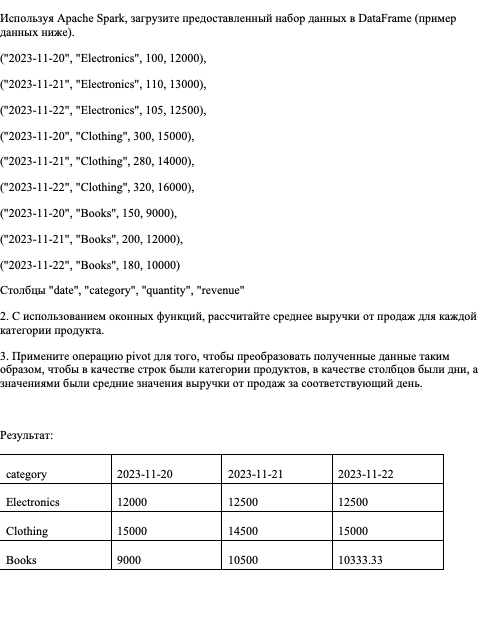

In [ ]:
Условие: есть набор данных о продажах продуктов с информацией о дате продаж, категории продукта, количестве и выручке от продаж.

Используя Apache Spark, загрузите предоставленный набор данных в DataFrame (пример данных ниже).

("2023-11-20", "Electronics", 100, 12000),
("2023-11-21", "Electronics", 110, 13000),
("2023-11-22", "Electronics", 105, 12500),
("2023-11-20", "Clothing", 300, 15000),
("2023-11-21", "Clothing", 280, 14000),
("2023-11-22", "Clothing", 320, 16000),
("2023-11-20", "Books", 150, 9000),
("2023-11-21", "Books", 200, 12000),
("2023-11-22", "Books", 180, 10000)

Столбцы: "date", "category", "quantity", "revenue".

С использованием оконных функций, рассчитайте среднее выручки от продаж для каждой категории продукта.
Примените операцию pivot для того, чтобы преобразовать полученные данные таким образом,
чтобы в качестве строк были категории продуктов, в качестве столбцов были дни,
а значениями были средние значения выручки от продаж за соответствующий день

In [ ]:
!pip install pyspark django >> None

In [10]:
#. Условие: есть набор данных о продажах продуктов с информацией о дате продаж,
#.          категории продукта, количестве и выручке от продаж.

# С использованием оконных функций, рассчитайте среднее выручки от продаж для каждой категории продукта.
# Примените операцию pivot для того, чтобы преобразовать полученные данные таким образом,
# чтобы в качестве строк были категории продуктов, в качестве столбцов были дни,
# а значениями были средние значения выручки от продаж за соответствующий день



# Решение:

from pyspark.sql import SparkSession

from pyspark.sql.functions import avg, col, window
from pyspark.sql.types import DateType

# Инициализация SparkSession
spark = SparkSession.builder.appName("SalesAnalysis").getOrCreate()

# Создание DataFrame с предоставленными данными
data = [
   ("2023-11-20", "Electronics", 100, 12000),
   ("2023-11-21", "Electronics", 110, 13000),
   ("2023-11-22", "Electronics", 105, 12500),
   ("2023-11-20", "Clothing", 300, 15000),
   ("2023-11-21", "Clothing", 280, 14000),
   ("2023-11-22", "Clothing", 320, 16000),
   ("2023-11-20", "Books", 150, 9000),
   ("2023-11-21", "Books", 200, 12000),
   ("2023-11-22", "Books", 180, 10000)
]
columns = ["date", "category", "quantity", "revenue"]
df = spark.createDataFrame(data, columns)

# Преобразование столбца "date" в тип Date
df = df.withColumn("date", col("date").cast(DateType()))

# Расчет средней выручки от продаж для каждой категории продукта
window_spec = window.partitionBy("category")
df_avg_revenue = df.groupBy(window_spec).agg(avg("revenue").alias("avg_revenue"))

# Применение операции pivot для преобразования данных
pivot_df = df_avg_revenue.groupBy("category").pivot("date").agg(avg("avg_revenue"))

# Вывод результата
pivot_df.show()

# Завершение работы SparkSession
spark.stop()



AnalysisException: [CANNOT_PARSE_INTERVAL] Unable to parse 'category'. Please ensure that the value provided is in a valid format for defining an interval. You can reference the documentation for the correct format. If the issue persists, please double check that the input value is not null or empty and try again.

In [ ]:
# и на pandas